# Checking Airborne Magnetics data

Author: Alice Fremand (@almand)

Date: 12/11/2021

## Aim

The goal of this tutorial is to easily check the airborne gravity data provided in XYZ format.

### Virtual environment

For the code to run, it is important to install the correct dependancies and libraries. In particular the following libraries are crucial for the code to be run: 

* pandas *module to check CSV and text data in python*
* geopandas *module to check data geospatially in python*



### To set up the virtual environment with Conda:
```
>conda create -n aerogeophysics_env
>conda activate aerogeophysics_env
>conda config --env --add channels conda-forge
>conda config --env --set channel_priority strict
>conda install python=3 geopandas
```

### To set up the virtual environment on UNIX: 
Load your python module:

`module load python/conda3`

Then in the folder where you have your code, you need to launch:

`python3 -m venv aerogeophysics_env`

It will create a folder with all the environment for python.
To activate the virtual environment you need to lauch it:

```
source aerogeophysics_env/bin/activate.csh
```

You need to make sure that [aerogeophysics_env] appears before your name on the machine. That means that you are using the virtual environment
Then you need to upgrade pip which is the command that install the packages

`python3 -m pip install --upgrade pip`

And install the other libraries

`python3 -m pip install geopandas`

In this tutorial, the virtual environment is already set up. The list of the current libraries loaded is given in the list below.

In [1]:
pip list

Package                       Version
----------------------------- -------------------
alabaster                     0.7.12
anyio                         3.3.4
argon2-cffi                   21.1.0
async-generator               1.10
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.10.0
bleach                        4.1.0
brotlipy                      0.7.0
certifi                       2021.10.8
cffi                          1.15.0
cftime                        1.5.1.1
chardet                       4.0.0
charset-normalizer            2.0.0
click                         7.1.2
click-completion              0.5.2
click-log                     0.3.2
click-plugins                 1.1.1
cligj                         0.7.1
cloudpickle                   1.6.0
colorama                      0.4.4
cryptography                  35.0.0
cycler                        0.10.0


### Load the relevant modules

In [2]:
import os
import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
#Specific module to plot the graph in the Jupyter Notebook
%matplotlib inline 

## Checking the XYZ files

Example given for GRADES-IMAGE data.

Data available for download here: Ferraccioli, F., & Jordan, T. (2020). Airborne magnetic data covering the Evans, and Rutford Ice Streams, and ice rises in the Ronne Ice Shelf (2006/07) (Version 1.0) [Data set]. UK Polar Data Centre, Natural Environment Research Council, UK Research & Innovation. https://doi.org/10.5285/7504BE9B-93BA-44AF-A17F-00C84554B819

### Reading the XYZ data


In [3]:
aeromag_data = 'E:/UKPDC/JupyterExample/AGAP_Mag.XYZ'

The XYZ data are composed of a large header and empty rows at the top. To read the file, it is recommended to remove these empty rows. The goal is to keep the 5th row which corresponds to the header but remove all the other ten first rows, we can specify these rows like this:

In [4]:
skiprow= list(range(0,11))
skiprow.remove(5)
skiprow

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10]

Then, we can use `pandas` to read the data. The data are separated by a space, we can specify the separator by using the `sep` parameter, we will use `skiprow

In [5]:
file = pd.read_csv(aeromag_data, skiprows=skiprow, sep= ' +', engine='python' )
file.head()

,/,Flight_ID,Line_no,Lon,Lat,x,y,Height_WGS1984,Date,Time,...,BCorr_AGAP_NS,BCorr_AGAP_S,BCorr_AGAP_SP,BCorr_Applied,MagBRTC,ACorr,SCorr,MagF,MagL,MagML
0,CTAM1,5.0,154.333738,-83.785881,2673830.187189,1076723.517935,3150.4,2008/12/08,03:30:04.00,*,...,*,*,*,*,*,*,*,*,*,NaN
1,CTAM1,5.0,154.332907,-83.786293,2673783.220184,1076719.879693,3151.2,2008/12/08,03:30:05.00,59475.32,...,*,-15.15,15.15,-148.65,*,*,-148.65,-148.65,-148.65,NaN
2,CTAM1,5.0,154.332099,-83.786706,2673736.205959,1076715.921844,3152.1,2008/12/08,03:30:06.00,59475.17,...,*,-15.14,15.14,-148.47,*,*,-148.47,-148.47,-148.47,NaN
3,CTAM1,5.0,154.331331,-83.787120,2673689.204893,1076711.467081,3153.4,2008/12/08,03:30:07.00,59475.19,...,*,-15.13,15.13,-148.28,*,*,-148.28,-148.28,-148.28,NaN
4,CTAM1,5.0,154.330608,-83.787535,2673642.281478,1076706.469544,3154.9,2008/12/08,03:30:08.00,59475.19,...,*,-15.12,15.12,-148.08,*,*,-148.08,-148.08,-148.08,NaN


As we can see, the first column is filled with 0, so we might want to remove it: 

In [6]:
column_names = file.columns.tolist()
column_names.remove('/')
column_names.append('toDelete')
file.columns = column_names
file = file.drop(columns='toDelete')
file.head()

,Flight_ID,Line_no,Lon,Lat,x,y,Height_WGS1984,Date,Time,MagR,...,BCorr_AGAP_NS,BCorr_AGAP_S,BCorr_AGAP_SP,BCorr_Applied,MagBRTC,ACorr,SCorr,MagF,MagL,MagML
0,CTAM1,5.0,154.333738,-83.785881,2673830.187189,1076723.517935,3150.4,2008/12/08,03:30:04.00,*,...,*,*,*,*,*,*,*,*,*,*
1,CTAM1,5.0,154.332907,-83.786293,2673783.220184,1076719.879693,3151.2,2008/12/08,03:30:05.00,59475.32,...,*,*,-15.15,15.15,-148.65,*,*,-148.65,-148.65,-148.65
2,CTAM1,5.0,154.332099,-83.786706,2673736.205959,1076715.921844,3152.1,2008/12/08,03:30:06.00,59475.17,...,*,*,-15.14,15.14,-148.47,*,*,-148.47,-148.47,-148.47
3,CTAM1,5.0,154.331331,-83.787120,2673689.204893,1076711.467081,3153.4,2008/12/08,03:30:07.00,59475.19,...,*,*,-15.13,15.13,-148.28,*,*,-148.28,-148.28,-148.28
4,CTAM1,5.0,154.330608,-83.787535,2673642.281478,1076706.469544,3154.9,2008/12/08,03:30:08.00,59475.19,...,*,*,-15.12,15.12,-148.08,*,*,-148.08,-148.08,-148.08


As you can see, a number of values are given a star for non value data. 
In this analysis, we are only interested n the longitude, latitude and magnetics anomaly. We will thus select these specific parameters.

### Selecting the variables

In [7]:
longitude = [variable for variable in file.columns.tolist() if (variable.startswith('Lon'))][0]
latitude = [variable for variable in file.columns.tolist() if (variable.startswith('Lat'))][0]
mag = [variable for variable in file.columns.tolist() if (variable.startswith('MagF'))][0]
file = file[[longitude,latitude, mag]]
file = file.replace('*', np.nan)
file = file.dropna()
file[longitude] = file[longitude].astype(float) #To make sure lat and Lon are float
file[latitude] = file[latitude].astype(float)
file[mag] = file[mag].astype(float)
file.head()

,Lon,Lat,MagF
1,154.332907,-83.786293,-148.65
2,154.332099,-83.786706,-148.47
3,154.331331,-83.787120,-148.28
4,154.330608,-83.787535,-148.08
5,154.329925,-83.787950,-147.89


We can also get some specific parameters:

In [8]:
ID = aeromag_data.split('/')[-1].strip('.XYZ')
survey = aeromag_data.split('/')[3]
print('''ID: %s
Survey: %s
Name of magnetic variable: %s
Name of longitude variable: %s
Name of latitude variable: %s''' %(ID, survey, mag, longitude, latitude))


ID: AGAP_Mag
Survey: AGAP_Mag.XYZ
Name of magnetic variable: MagF
Name of longitude variable: Lon
Name of latitude variable: Lat


### Have a look at the data geospatially

We can easily convert the data to spatial objects using `geopandas`. The `geopandas` module is used to convert the data to a geodataframe. It will convert the latitude/longitude to points.
To do that, you will need to identify the specific header used for longitude and latitude in the CSV file.

In [9]:
gdf = gpd.GeoDataFrame(file, geometry=gpd.points_from_xy(file[longitude], file[latitude]))

We can check the conversion:

In [10]:
gdf.head()

,Lon,Lat,MagF,geometry
1,154.332907,-83.786293,-148.65,POINT (154.33291 -83.78629)
2,154.332099,-83.786706,-148.47,POINT (154.33210 -83.78671)
3,154.331331,-83.787120,-148.28,POINT (154.33133 -83.78712)
4,154.330608,-83.787535,-148.08,POINT (154.33061 -83.78754)
5,154.329925,-83.787950,-147.89,POINT (154.32993 -83.78795)


## Setting up the coordinate system

It is important to then set the coordinate system. 
Here the WGS84 coordinate system is used, it corresponds to the EPSG: 4326. 

In [11]:
gdf = gdf.set_crs("EPSG:4326")

With geopandas, it is also possible to convert the data to another coordinate system and project it. You just need to know the EPSG ID of the output coordinate system. Here is how to convert the data to the Polar Antarctic stereographic geographic system (https://epsg.io/3031).

In [12]:
gdf =  gdf.to_crs("EPSG:3031")

## Plotting the data

<AxesSubplot:>

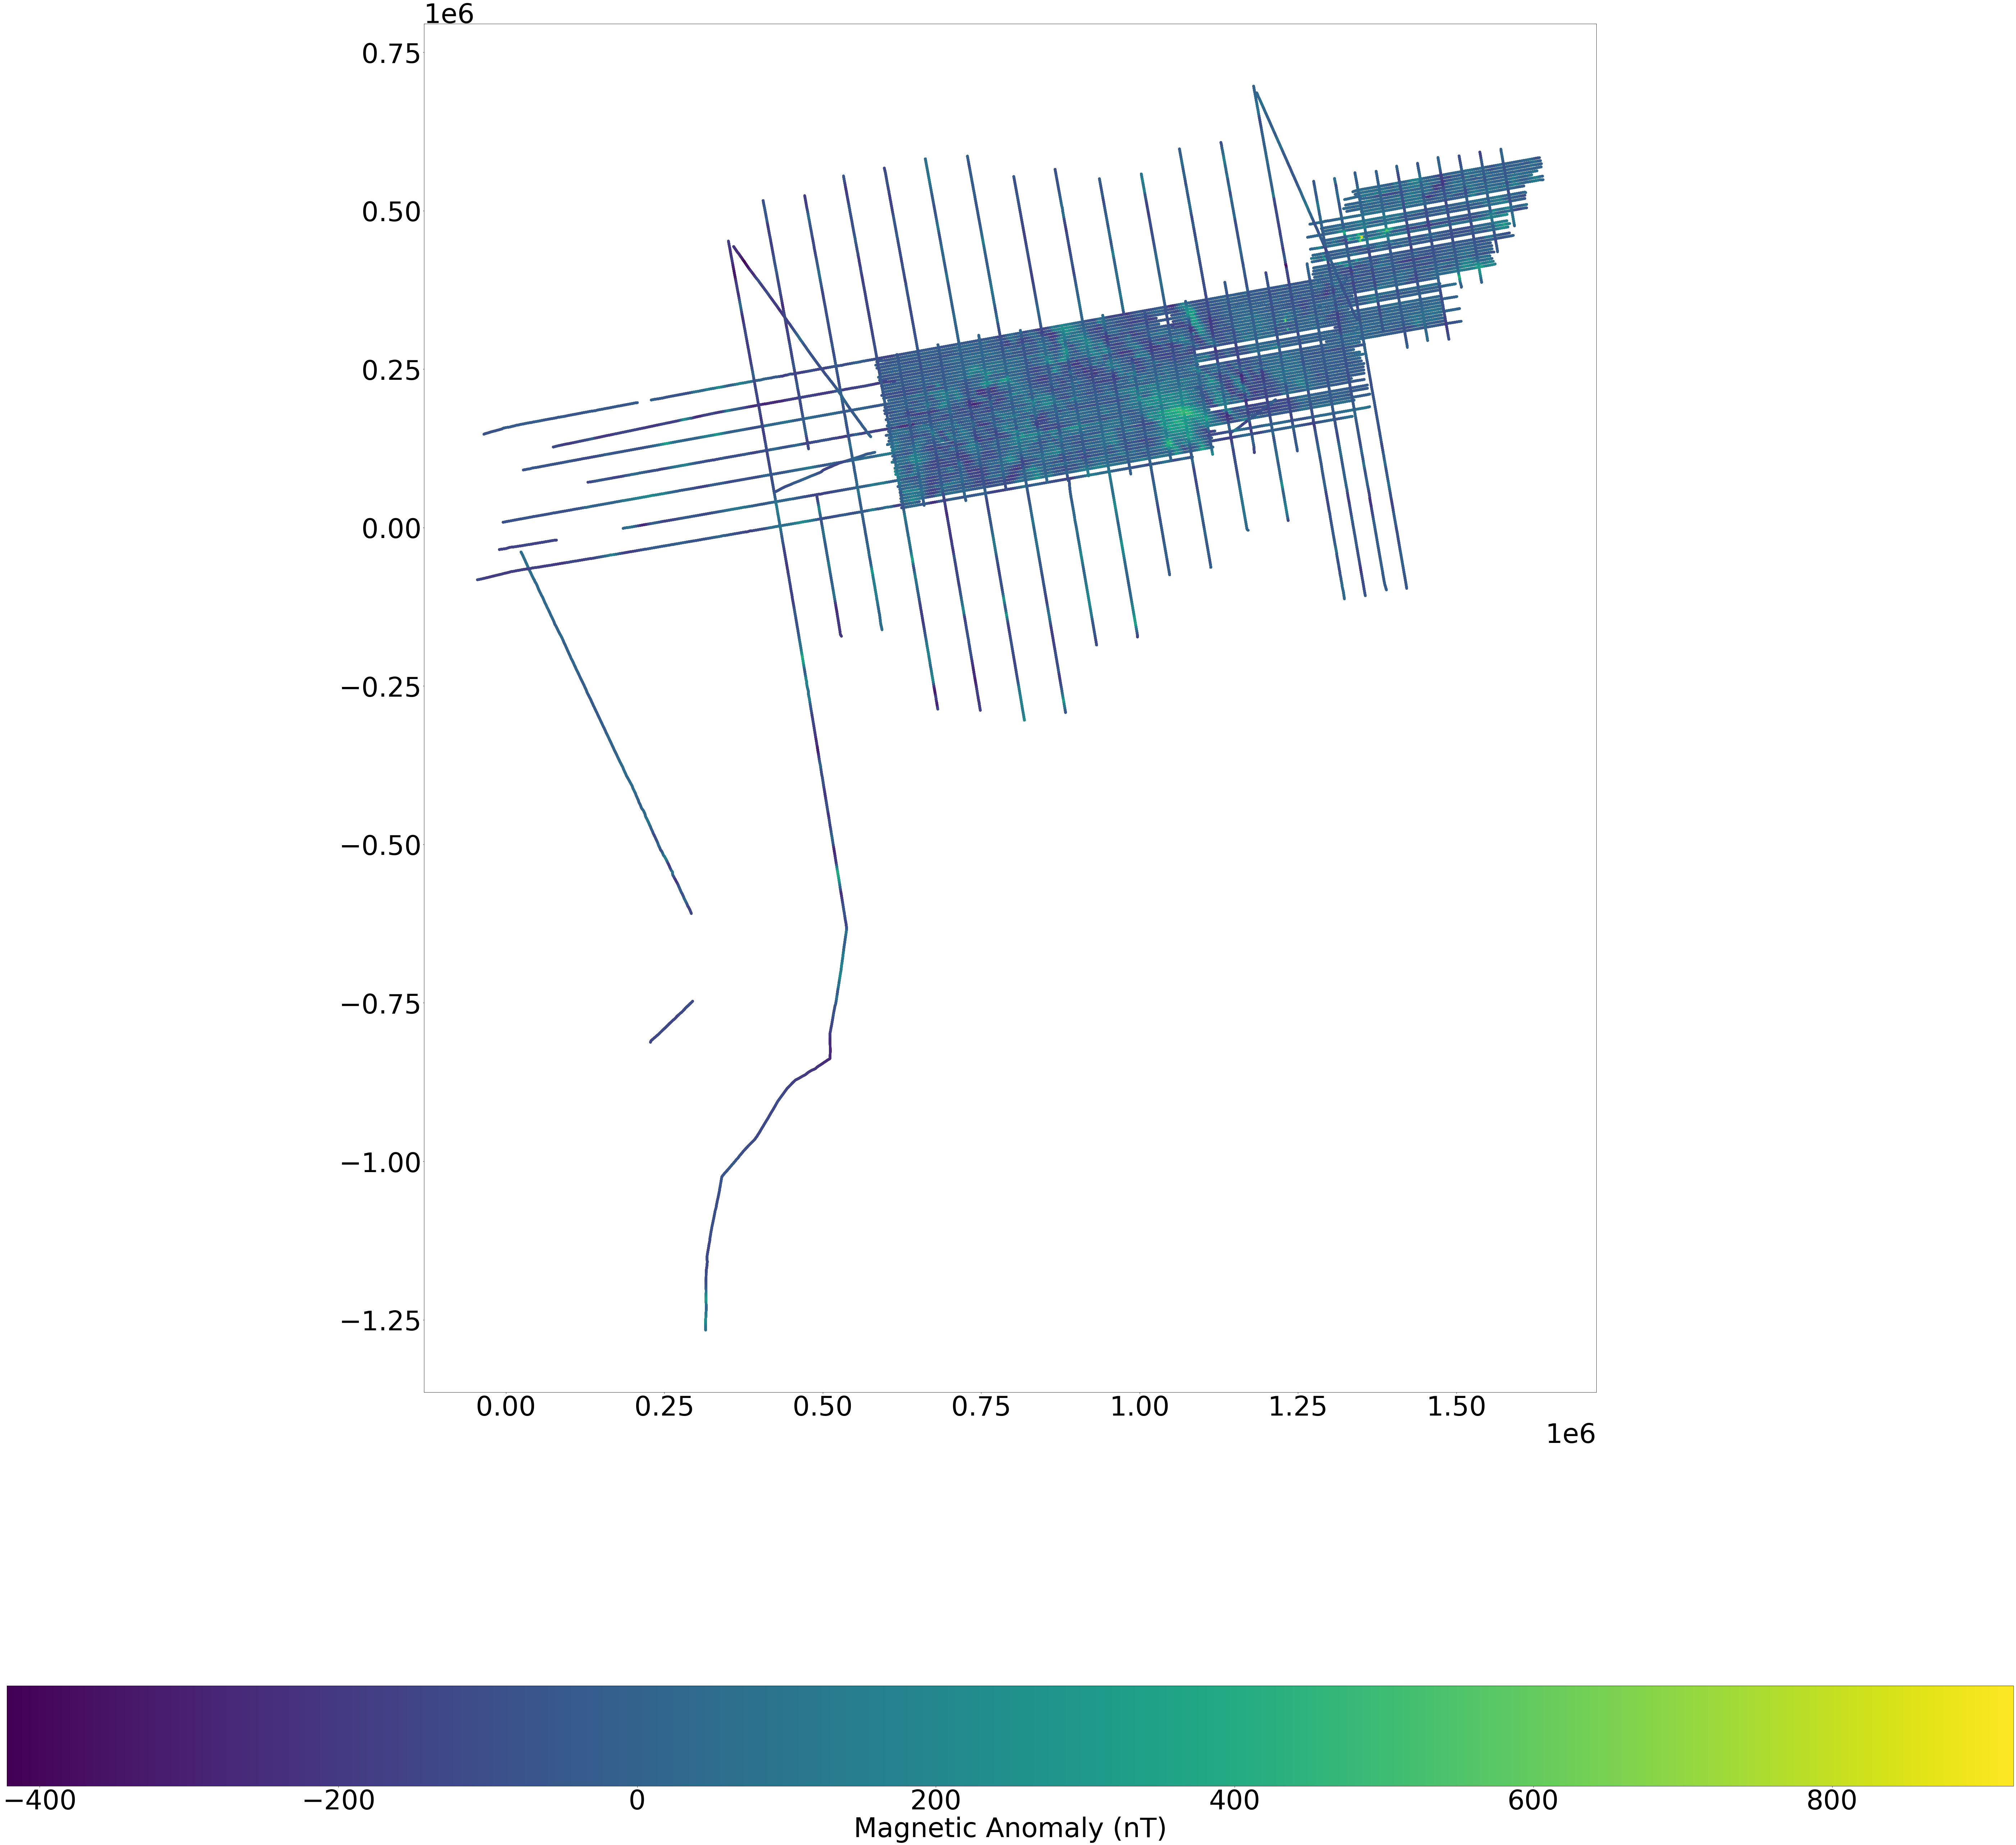

<Figure size 10000x10000 with 0 Axes>

In [13]:
plt.rcParams["figure.figsize"] = (100,100)
plt.rcParams.update({'font.size': 75})
fig, ax = plt.subplots(1, 1)
fig=plt.figure(figsize=(100,100), dpi= 100, facecolor='w', edgecolor='k')
gdf.plot(column=mag, ax=ax, legend=True, legend_kwds={'label': "Magnetic Anomaly (nT)",'orientation': "horizontal" })

# Calculate statistics about the data

## Size of the dataset

In [14]:
size = round(os.path.getsize(aeromag_data)/1e+6)
print('size: %s MB' %size)

size: 513 MB


## Magnetics anomaly statistics

In [15]:
mean_mag=round(file[mag].mean())
max_mag=round(file[mag].max())
latlong_max_mag=(file[longitude][file[mag].idxmax()],file[latitude][file[mag].idxmax()])
min_mag=round(file[mag].min())
latlong_min_mag=(file[longitude][file[mag].idxmin()],file[latitude][file[mag].idxmin()])

print('''
Mean magnetic anomaly: %s nT
Max magnetic anomaly: %s nT
Longitude and latitude of maximum magnetic anomaly: %s
Minimum magnetic anomaly: %s nT
Longitude/Latitude of minimum magnetic anomaly: %s''' %(mean_mag, max_mag, latlong_max_mag, min_mag, latlong_min_mag))


Mean magnetic anomaly: -12 nT
Max magnetic anomaly: 921 nT
Longitude and latitude of maximum magnetic anomaly: (71.247489, -76.942731)
Minimum magnetic anomaly: -422 nT
Longitude/Latitude of minimum magnetic anomaly: (41.734519, -84.813545)


## Calculate distance along the profile

In [16]:
file['distance'] = gdf.distance(gdf.shift(1))
distance_total=round(sum(file.distance[file.distance<15000])/1000)
print('Dstance along the profile: %s km' %distance_total)

Dstance along the profile: 73676 km


## Calculate number of points

In [17]:
nb_points= len(file)
print('Number of points: %s' %nb_points)

Number of points: 1109941


## Looking at the magnetics anomaly along the profile

Text(0.5, 1.0, 'Magnetic anomaly along the profile')

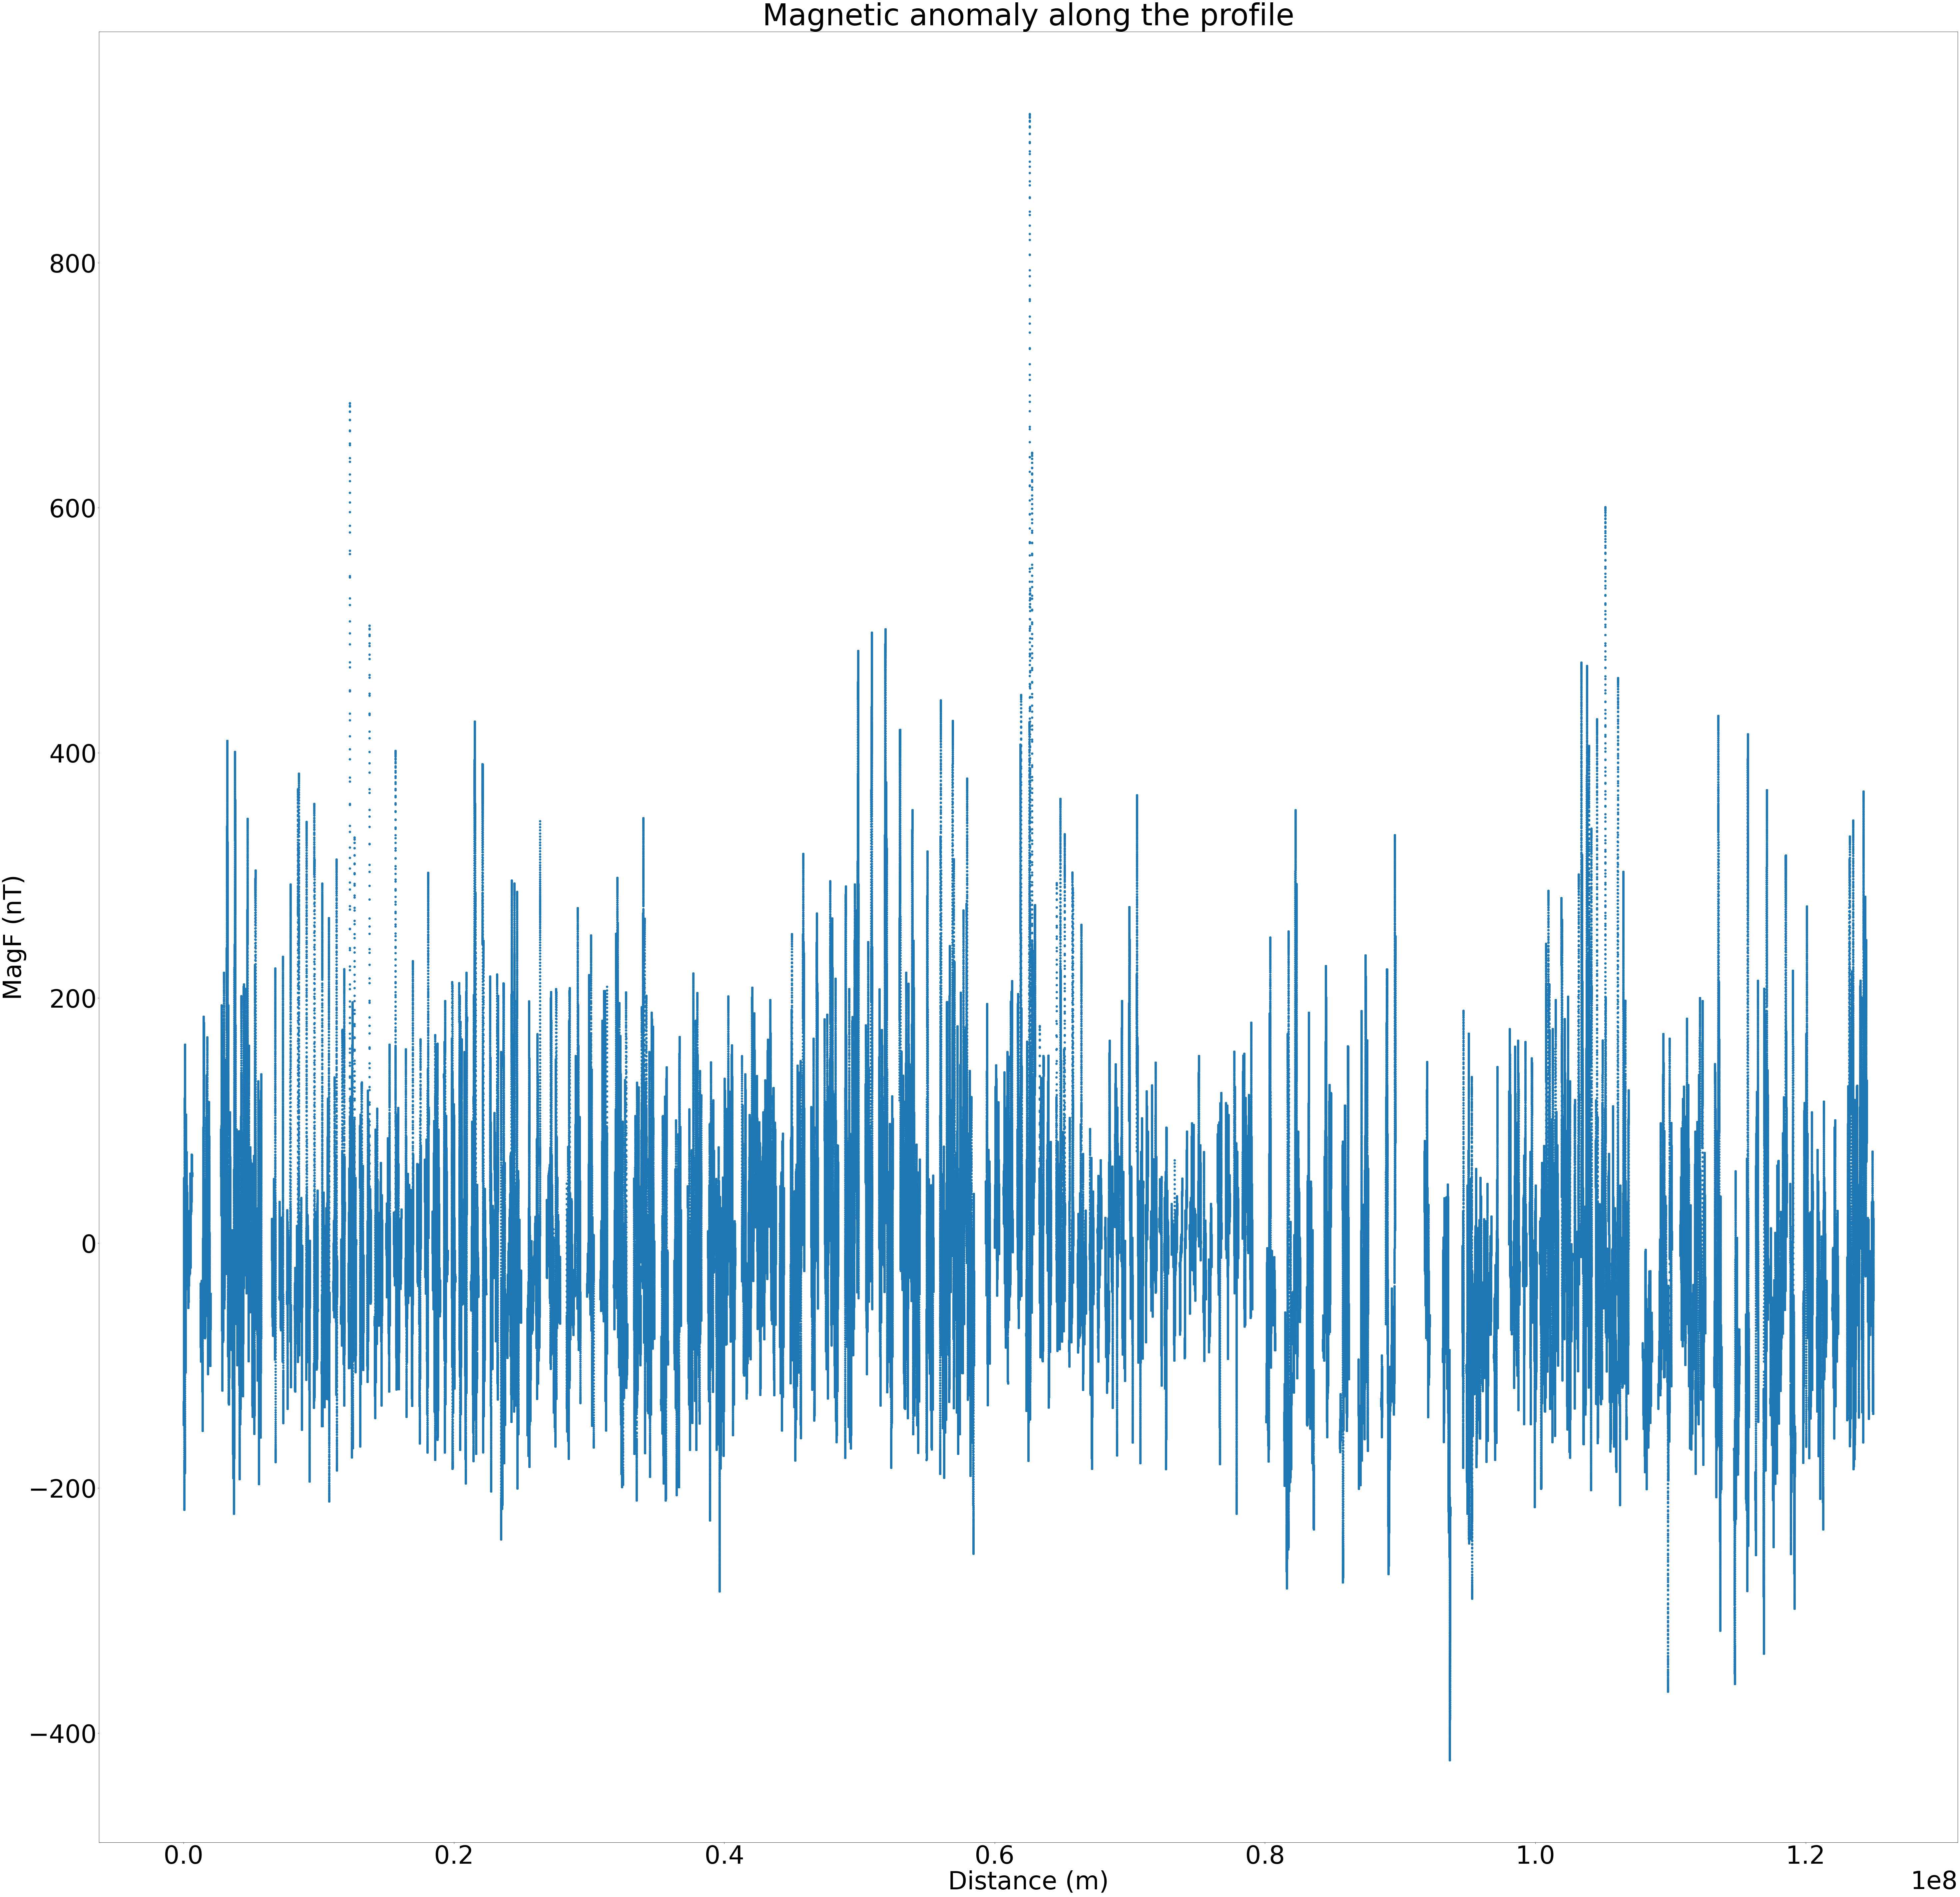

In [18]:
file['distance'] = file['distance'].cumsum() #To have the cumulative sum of the distance
plt.scatter(file.distance, file[mag])
plt.xlabel('Distance (m)')
plt.ylabel('%s (nT)' %mag)
plt.title('Magnetic anomaly along the profile')